In [ ]:
!pip install ktrain

     |████████████████████████████████| 25.3 MB 1.3 MB/s 
     |████████████████████████████████| 22.3 MB 1.4 MB/s 
     |████████████████████████████████| 981 kB 47.4 MB/s 
     |████████████████████████████████| 263 kB 60.0 MB/s 
     |████████████████████████████████| 2.8 MB 52.9 MB/s 
     |████████████████████████████████| 1.2 MB 48.7 MB/s 
     |████████████████████████████████| 468 kB 54.5 MB/s 
     |████████████████████████████████| 77 kB 8.5 MB/s 
     |████████████████████████████████| 596 kB 64.5 MB/s 
     |████████████████████████████████| 3.3 MB 45.9 MB/s 
     |████████████████████████████████| 895 kB 63.6 MB/s 
  Created wheel for ktrain: filename=ktrain-0.30.0-py3-none-any.whl size=25309161 sha256=ebed95075f7142507425530739ed1d31fd6d2bfebb3376fe83e55a6b5b8d1b7e
  Stored in directory: /root/.cache/pip/wheels/25/00/ae/80d1b19dd02bc2e6bc9bac32ba7dbaa59aad789e93274e4868
  Created wheel for keras-bert: filename=keras_bert-0.89.0-py3-none-any.whl size=33517 sha256=2627f80aa

In [ ]:
!pip install tensorflow

     |████████████████████████████████| 462 kB 5.1 MB/s 


In [ ]:
import pandas as pd
import numpy as np
import time
import argparse
import string
from sklearn.model_selection import train_test_split
from nltk.tokenize import regexp_tokenize
from datetime import datetime
import pytz
import ktrain
from ktrain import text

In [ ]:
df = pd.read_csv('Tweets.csv')

In [ ]:
X = df['text']
y = df['airline_sentiment']

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2, 
                                                    random_state=42, shuffle=True)


In [ ]:
X_train = X_train.tolist()
X_test = X_test.tolist()
y_train = y_train.tolist()
y_test = y_test.tolist()

##BERT

In [ ]:
trn, val, preproc = text.texts_from_array(x_train=X_train, 
                                          y_train=y_train,
                                          x_test=X_test, 
                                          y_test=y_test,
                                          class_names=['positive','negative','neutral'],
                                          preprocess_mode='bert',
                                          ngram_range=1,
                                          maxlen=500)

downloading pretrained BERT model (uncased_L-12_H-768_A-12.zip)...
[██████████████████████████████████████████████████]
extracting pretrained BERT model...
done.

cleanup downloaded zip...
done.

preprocessing train...
language: en


Is Multi-Label? False
preprocessing test...
language: en


/usr/local/lib/python3.7/dist-packages/ktrain/utils.py:625: UserWarning: class_names argument was ignored, as they were extracted from string labels in dataset
  if self.get_classes(): warnings.warn('class_names argument was ignored, as they were extracted from string labels in dataset')


task: text classification


In [ ]:
model = text.text_classifier('bert', train_data=trn, preproc=preproc)

Is Multi-Label? False
maxlen is 500
done.


In [ ]:
learner = ktrain.get_learner(model, train_data=trn, batch_size=6)

simulating training for different learning rates... this may take a few moments...
Epoch 1/1024
1221/1221 [==============================] - 1025s 820ms/step - loss: 1.2354 - accuracy: 0.5815
Epoch 2/1024
1221/1221 [==============================] - 15s 11ms/step - loss: 10.9507 - accuracy: 0.4444


done.
Please invoke the Learner.lr_plot() method to visually inspect the loss plot to help identify the maximal learning rate associated with falling loss.


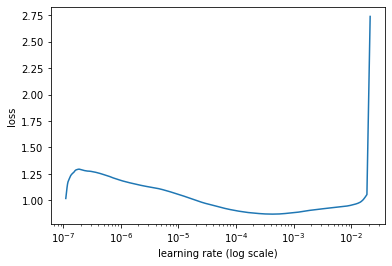

In [ ]:
learner.lr_find()
learner.lr_plot()

In [ ]:
learner.autofit(2e-5, 5)



begin training using triangular learning rate policy with max lr of 2e-05...
Epoch 1/5
1221/1221 [==============================] - 1028s 825ms/step - loss: 0.5765 - accuracy: 0.7671
Epoch 2/5
1221/1221 [==============================] - 1008s 826ms/step - loss: 0.3632 - accuracy: 0.8624
Epoch 3/5
1221/1221 [==============================] - 1009s 826ms/step - loss: 0.2324 - accuracy: 0.9215
Epoch 4/5
1221/1221 [==============================] - 1009s 826ms/step - loss: 0.1432 - accuracy: 0.9525
Epoch 5/5
1221/1221 [==============================] - 1011s 828ms/step - loss: 0.0911 - accuracy: 0.9712


In [ ]:
learner.validate(val_data=val)


              precision    recall  f1-score   support

           0       0.89      0.91      0.90      1026
           1       0.75      0.71      0.73       455
           2       0.81      0.81      0.81       350

    accuracy                           0.84      1831
   macro avg       0.82      0.81      0.81      1831
weighted avg       0.84      0.84      0.84      1831



array([[936,  67,  23],
       [ 88, 323,  44],
       [ 29,  39, 282]])

In [ ]:
predictor = ktrain.get_predictor(learner.model, preproc)

In [ ]:
predictor.get_classes()


['negative', 'neutral', 'positive']

In [ ]:
predictor.predict(X_test[0:3])

['negative', 'negative', 'negative']

In [ ]:
y_test[:3]

['negative', 'negative', 'negative']

##DistillBERT

In [ ]:

trn_d, val_d, preproc_d = text.texts_from_array(x_train=X_train, 
                                          y_train=y_train,
                                          x_test=X_test, 
                                          y_test=y_test,
                                          class_names=['positive','negative','neutral'],
                                          preprocess_mode='distilbert',
                                          maxlen=350)

Downloading:   0%|          | 0.00/483 [00:00<?, ?B/s]

preprocessing train...
language: en
train sequence lengths:
	mean : 17
	95percentile : 27
	99percentile : 29


/usr/local/lib/python3.7/dist-packages/ktrain/utils.py:625: UserWarning: class_names argument was ignored, as they were extracted from string labels in dataset
  if self.get_classes(): warnings.warn('class_names argument was ignored, as they were extracted from string labels in dataset')


Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Is Multi-Label? False
preprocessing test...
language: en
test sequence lengths:
	mean : 17
	95percentile : 27
	99percentile : 29


task: text classification


In [ ]:
model_d = text.text_classifier('distilbert', train_data=trn_d, preproc=preproc_d)

Is Multi-Label? False
maxlen is 350


Downloading:   0%|          | 0.00/363M [00:00<?, ?B/s]

done.


In [ ]:
learner_d = ktrain.get_learner(model_d, train_data=trn_d, val_data=val_d, batch_size=6)

In [ ]:
learner_d.fit_onecycle(3e-5, 4)



begin training using onecycle policy with max lr of 3e-05...
Epoch 1/4
1221/1221 [==============================] - 329s 257ms/step - loss: 0.6410 - accuracy: 0.7350 - val_loss: 0.6085 - val_accuracy: 0.7553
Epoch 2/4
1221/1221 [==============================] - 314s 256ms/step - loss: 0.4338 - accuracy: 0.8383 - val_loss: 0.4639 - val_accuracy: 0.8247
Epoch 3/4
1221/1221 [==============================] - 313s 255ms/step - loss: 0.2670 - accuracy: 0.9033 - val_loss: 0.5061 - val_accuracy: 0.8269
Epoch 4/4
1221/1221 [==============================] - 314s 256ms/step - loss: 0.1050 - accuracy: 0.9696 - val_loss: 0.5730 - val_accuracy: 0.8378


In [ ]:
learner_d.validate(val_data = val_d)

              precision    recall  f1-score   support

           0       0.89      0.91      0.90      1026
           1       0.74      0.71      0.72       455
           2       0.80      0.80      0.80       350

    accuracy                           0.84      1831
   macro avg       0.81      0.80      0.81      1831
weighted avg       0.84      0.84      0.84      1831



array([[933,  70,  23],
       [ 89, 321,  45],
       [ 28,  42, 280]])

In [ ]:
p = ktrain.get_predictor(model_d, preproc_d)